In [1]:
%%html
<style>
:root {
    --primary: #7b8e2d;
    /* Used for subtitles, captions and code */
    --secondary: #5e705f;
    /* The top part of the left navbar */
    --navbar-header-bg: 
    /* Links  */
    --links: #b2ce41;
    /* Background color of jupyter input cell */
    --jupyter-in-cell-bg: #e3ffd28c;
}


.rise-enabled .reveal section img {
  display: block;
  margin-left: auto;
  margin-right: auto;
}


.cell .maintitle, .cell .maintitle * {
    margin-left: auto;
    margin-right: auto;
    text-align: center;
    color: var(--primary) !important
}


.cell h1, .cell h3, .cell em, .cell strong, .cell li::marker, 
.cell span.MathJax, .cell code {
    color: var(--primary) !important
}

.cell .decisionmatrix-dim {
    color: black !important;
}
        
.cell h2, .cell h4 {
    color: var(--secondary) !important
}

.cell a {
    color: var(--links) !important;
    text-decoration: none !important; 
}
                

.cell a::after {
    content: "⬏"; 
    color: var(--primary) !important
}
    
.cell table.clean, .cell table.clean tr, .cell table.clean td {
    background-color: white;
    border: none;
}
        
</style>

In [2]:
import warnings
warnings.simplefilter("ignore", FutureWarning)

<div class="maintitle">
    <h2> Métodos Multicriterio Orientados al Tratamiento Automático de Datos</h2>
    <h3 class="subtitle">Diplomatura en Ciencias de Datos, Aprendizaje Automático y sus Aplicaciones</h3>
    <span>FaMAF-UNC, 2022 </span>
</div>

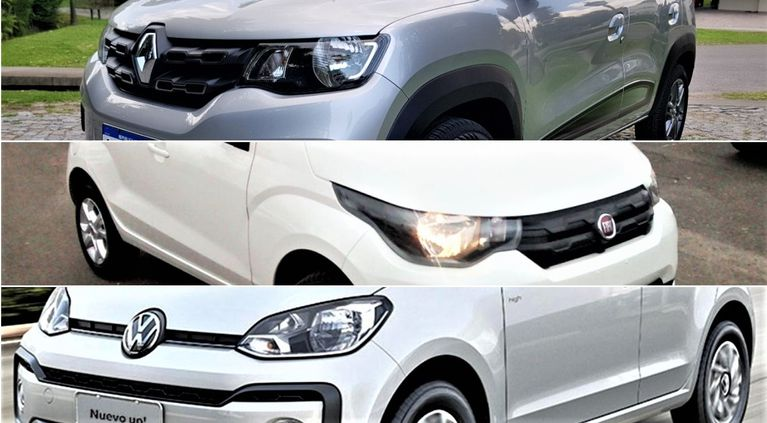

**Docentes:**
- Dr. Juan B Cabral (FaMAF-UNC, CONAE, IATE-OAC-CONICET)
- Mg. Nadia Luczywo (FCE-UNC)

## Sobre la imágen anterior

Un familia decidió invertir en un nuevo automóvil de bajo costo que pueda utilizar con comodidad en la ciudad. Luego de revisar la oferta redujo las *alternativas* de compra a tres autos similares del tipo city-car: *VW Up*, *Fiat Moby* y *Renault Kwid*. 

En general, esta familia, valora: La velocidad del vehículo, la autonomía, el confort, la seguridad y el precio.

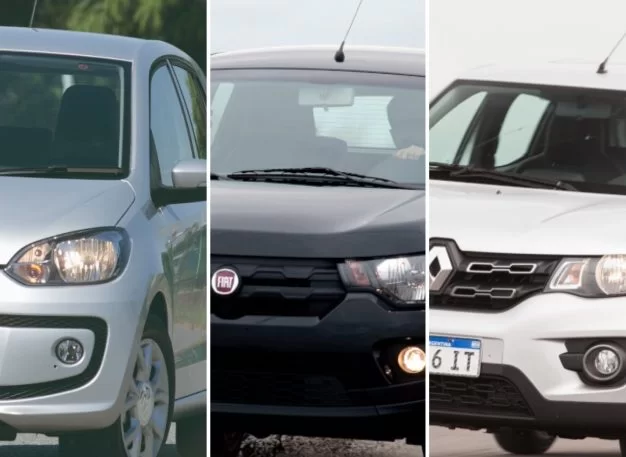

## Sobre la imágen anterior - cont.

Analicemos un poco:

- *Velocidad del vehículo:* Se mide en $Km/h$, y mientras *mas alta* mejor.
- *Autonomía:* Supongamos que en tanque lleno, y mientras mas $Km$ realiza el vehículo mejor.
- *Confort:* Lo sacamos de alguna revista y le ponemos algún puntaje del 1-10, donde 1 es lo peor, y 10 es lo mejor.
- *Seguridad:* Sacamos el indice de estrellas de [Latin NCAP](https://www.latinncap.com). 5 estrellas lo tienen los autos mas seguros.
- *Precio:* Sacamos el precio del [Registo Automotor](https://www.registroautomotor.info), y obviamente mientras mas barato, mejor.

## Sobre la imágen anterior - cont.

O en otras palabras los *criterios* son:

- *Velocidad del vehículo:* $Km/h$ (continua a $maximizar$).
- *Autonomía:* $Km$ (continua a $maximizar$).
- *Confort:* [1-10] (categorica a $maximizar$).
- *Seguridad:* [1-5] (categorica a $maximizar$).
- *Precio:* Pesos (continua a $minimizar$).

Ademas no tenemos que funciones generan los valores de cada

## Sobre la imágen anterior - Final.

Que preguntas razonables podemos hacer a este set de datos?

1. Cual es el mejor auto?
2. Hay algunos autos mejores que los demas?
3. Hay algun orden desde el mejor al peor?
4. Hay alguna alternativa claramente mejor?
5. Hay algun criterio mas importante que los demas?
6. Si asumimos error, que tan estble son las soluciones de las preguntas *1*, *2* y *3*?

## Disclaimers

- No ~me considero~ soy un experto en el tema.
- Es un tema que me resulta super interesante pero esta bastante sub-utilizado en la ciencia de datos.
- El curso esta orientado a poner sobre la mesa una familia de tecnicas de análisis de datos.
- Estas disciplinas estan metidas dentro de la Investigación de operaciones.

## Decisión Multicriterio Discreta

> DMD, es el contexto que brinda un marco teórico y distintas metodologías para la resolución de problemas de decisión en los que se presenta la elección de una de entre varias alternativas, en consideración a diversos ejes o puntos de vista denominados atributos u objetivos.

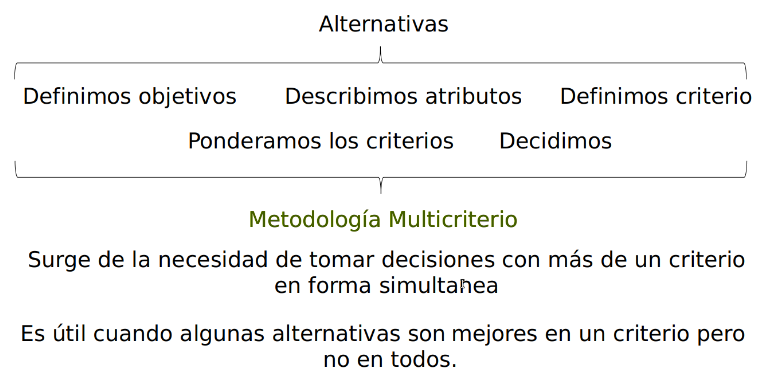

## Tipos de DMD ($\alpha$, $\beta$, $\gamma$)

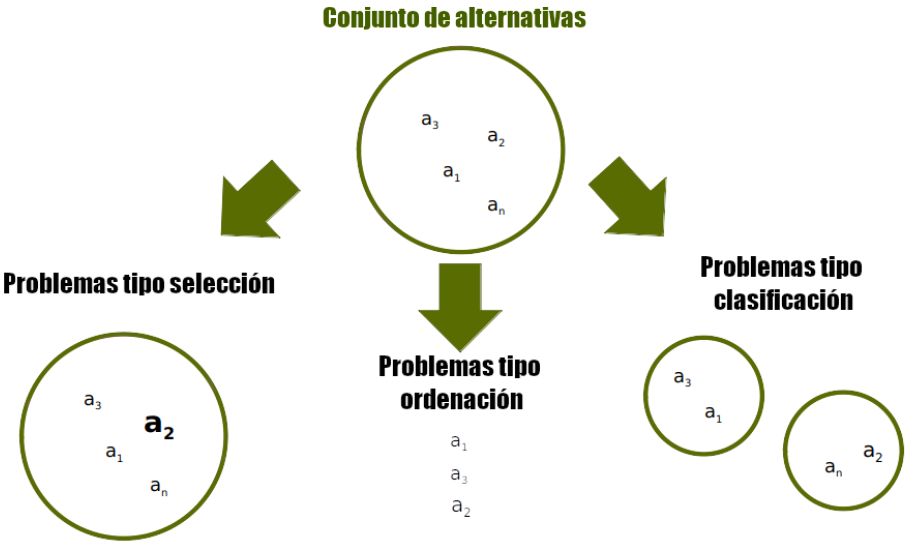

## Scikit-Criteria

- **Scikit-Criteria** es una colección de metodos y herramentas para análisis de decisiones con criterios múltiples.
- Está integrado en al stack científico de Python. 
- Es de código abierto y comercialmente utilizable.
- Esta "inspirado" en la forma de trabajo de Scikit-learn (robar es malo).
- Tiene un diseño pensando en exponer la semántica del MCDM.
- Todos sos objtos son *inmutables*.
- Todo devuelve una copia.

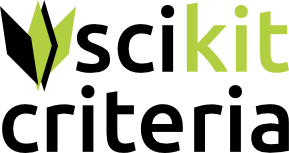

http://scikit-criteria.org/

## Scikit-Criteria: La competencia

![PyPI - Downloads](https://img.shields.io/pypi/dm/scikit-criteria?label=Scikit-Criteria&style=for-the-badge)
![PyPI - Downloads](https://img.shields.io/pypi/dm/pydecision?label=pydecision&style=for-the-badge)
![PyPI - Downloads](https://img.shields.io/pypi/dm/pymcda?label=pymcda&style=for-the-badge)
![PyPI - Downloads](https://img.shields.io/pypi/dm/pymcdm?label=pymcdm&style=for-the-badge)

### Instalación

```bash
$ <pip|conda|mamba> install scikit-criteria
```

## MCDA: El proceso completo

1. Identificar y definir las **alternativas** de decisión, que deben ser factibles, exhaustivas y excluyentes. 
2. Definir los **atributos a optimizar**. Identificar objetivos que son de maximización o de minimización.    
3. Asociar a cada objetivo o atributo, una **función de utilidad** que permita expresar una valoración cuantitativa de cada alternativa respecto al atributo ($atributo + función = criterio$). 
4. Consignar las valoraciones de cada alternativa respecto de cada criterio en una matriz de decisión.
5. Fija “umbrales de satisfacción” para cada criterio, de manera tal que se eliminen las alternativas que en algún criterio no los superan.
6. Preánalisis de dominancia. 
5. Si se requiere, transformar las valoraciones de las alternativas correspondientes a criterios de maximización.
6. Ponderar o asignar valoraciones a los criterios, conforme a la importancia relativa que tienen para el decisor, mediante una función de utilidad. Consignar en la matriz de decisión los $U(C_j)= w_jv$
7. Escalar/Normalizar todas las valoraciones, consignadas en la matriz de decisión completa, para llevarlas a una escala común y hacerlas comparables. Obtener así la matriz de decisión definitiva.
8. Seleccionar un **MÉTODO DE AGREGACIÓN**.

## Problema

A fin de decidir comprar una serie de bonos, una empresa estudió 5 inversiones candidatas: PE, JN, AA, FX, MM y GN. El departamento de finanzas decide considerar los siguientes criterios para la selección:

- Criterio 1 **ROE**: Rendimiento % por cada peso invertido. Sentido de optimidad, Maximizar 
- Criterio 2 **CAP**: Años de capitalización en el mercado. Sentido de optimidad, Maximizar  
- Criterio 3 **RI**: Puntos de riesgo del título valor. Sentido de optimidad, Minimizar 

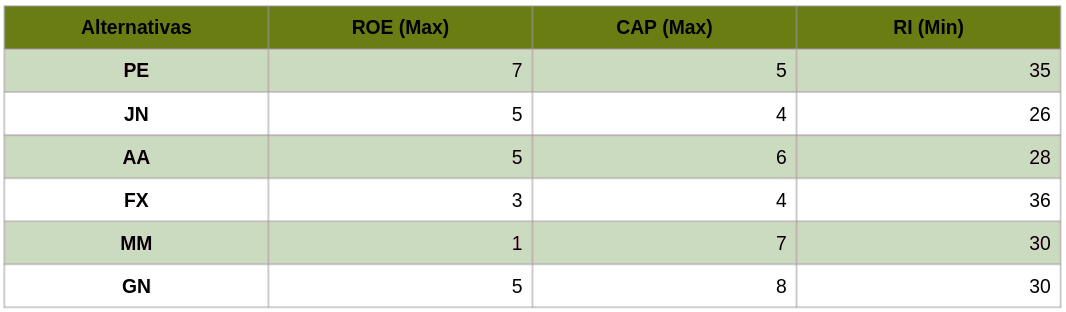

## Etapas 1-3: Manual

1. Identificar y definir claramente las **alternativas** de decisión, que deben ser factibles, exhaustivas y excluyentes. 
2. Definir los **atributos a optimizar**. Identificar objetivos que son de maximización o de minimización.    
3. Asociar a cada objetivo o atributo, una **función de utilidad** que permita expresar una valoración cuantitativa de cada alternativa respecto al atributo ($atributo + función = criterio$). 

> Los criterios tienen que tener las siguientes propiedades:
>
> - **Exhaustividad:** Los aspectos relevantes del problema deben aparecer reflejarse en los  criterios.
> - **Coherencia:** Las preferencias globales del decisor deben ser coherentes con los criterios.
> - **No redundancia entre criterios:** Si no se considera puede ocurrir que se duplique importancia a criterios redundantes.

## Etapa 4: `skcriteria.DecisionMatrix`

4. Consignar las valoraciones de cada alternativa respecto de cada criterio en una matriz de decisión

In [3]:
import skcriteria as skc

dm = skc.mkdm(
    matrix=[[7, 5, 35], 
            [5, 4, 26], 
            [5, 6, 28], 
            [3, 4, 36],
            [1, 7, 30],
            [5, 8, 30]],
    objectives=[max, max, min],
    alternatives=["PE", "JN", "AA", "FX", "MM", "GN"],
    criteria=["ROE", "CAP", "RI"]
)

dm

,ROE[▲ 1.0],CAP[▲ 1.0],RI[▼ 1.0]
PE,7,5,35
JN,5,4,26
AA,5,6,28
FX,3,4,36
MM,1,7,30
GN,5,8,30


## Etapa 4: `skcriteria.DecisionMatrix` (cont.)

- Se puede acceder a las alternativas y a los criterios como propiedades.
- Heredan todas las funcionalidades de un `numpy.array` ademas de implementar funciones "tipo" `dict`.

In [4]:
dm.alternatives

_ACArray(['PE', 'JN', 'AA', 'FX', 'MM', 'GN'], dtype=object)

In [5]:
dm.alternatives["PE"]

ROE     7
CAP     5
RI     35
Name: PE, dtype: int64

In [6]:
dm.criteria

_ACArray(['ROE', 'CAP', 'RI'], dtype=object)

In [7]:
dm.criteria["ROE"]

PE    7
JN    5
AA    5
FX    3
MM    1
GN    5
Name: ROE, dtype: int64

## Etapa 4: `skcriteria.DecisionMatrix` (cont.)

Se puede acceder a objetivos y tipos de datos con un formato tipo `pandas.Serie`.

In [8]:
dm.objectives

ROE    MAX
CAP    MAX
RI     MIN
Name: Objectives, dtype: object

In [9]:
dm.iobjectives

ROE    1
CAP    1
RI    -1
dtype: int8

In [10]:
dm.dtypes

ROE    int64
CAP    int64
RI     int64
dtype: object

## Etapa 4: `skcriteria.DecisionMatrix` (cont.)

La matriz interna de valores (sin objetivos, ni pesos) puede accederse con un formato `pandas.DataFrame`

In [11]:
dm.matrix

Criteria,ROE,CAP,RI
Alternatives,,,
PE,7,5,35
JN,5,4,26
AA,5,6,28
FX,3,4,36
MM,1,7,30
GN,5,8,30


## Etapa 4: `skcriteria.DecisionMatrix` (cont.)

`DecisionMatrix` tambien soporta operaciones de slice y dice como los `DataFrames` con los accessors `loc`, `iloc` (alternatives/filas) y `[]` (criterios/columnas)

In [12]:
dm[["RI", "ROE"]]  # criteria slice

,RI[▲ 1.0],ROE[▼ 1.0]
PE,35,7
JN,26,5
AA,28,5
FX,36,3
MM,30,1
GN,30,5


In [13]:
dm.loc[["PE", "AA"]]  # alternative slice

,ROE[▲ 1.0],CAP[▲ 1.0],RI[▼ 1.0]
PE,7,5,35
AA,5,6,28


In [14]:
dm.iloc[:-1]  # alternative slice by order

,ROE[▲ 1.0],CAP[▲ 1.0],RI[▼ 1.0]
PE,7,5,35
JN,5,4,26
AA,5,6,28
FX,3,4,36
MM,1,7,30


## Etapa 4: `skcriteria.DecisionMatrix` (cont.)

El atributo `stats` accede a todas las funcionalidades estadisticas subyacentes de `pandas.DataFrame`

In [15]:
dm.stats() # equivalente a dm.stats.describe() o dm.stats("describe")

,ROE,CAP,RI
count,6.000000,6.000000,6.000000
mean,4.333333,5.666667,30.833333
std,2.065591,1.632993,3.920034
min,1.000000,4.000000,26.000000
25%,3.500000,4.250000,28.500000
50%,5.000000,5.500000,30.000000
75%,5.000000,6.750000,33.750000
max,7.000000,8.000000,36.000000


In [16]:
dm.stats.corr()  # dm.stats("corr")

,ROE,CAP,RI
ROE,1.000000,-0.197642,0.032933
CAP,-0.197642,1.000000,-0.229117
RI,0.032933,-0.229117,1.000000


## Etapa 4: `skcriteria.DecisionMatrix` (cont.)

Posee una amplia variedad de plots, tanto como para pesos como para la matriz de alternativas

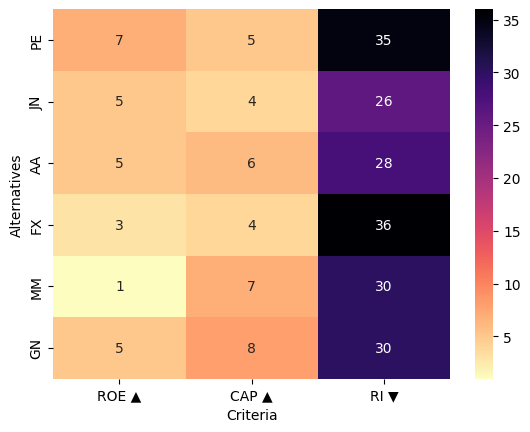

In [17]:
dm.plot(cmap="magma_r");  # dm.plot("heatmap", cmap="magma_r") | dm.plot.heatmap(cmap="magma_r")

## Etapa 4: `skcriteria.DecisionMatrix` (cont.)

Posee una amplia variedad de plots, tanto como para pesos como para la matriz de alternativas

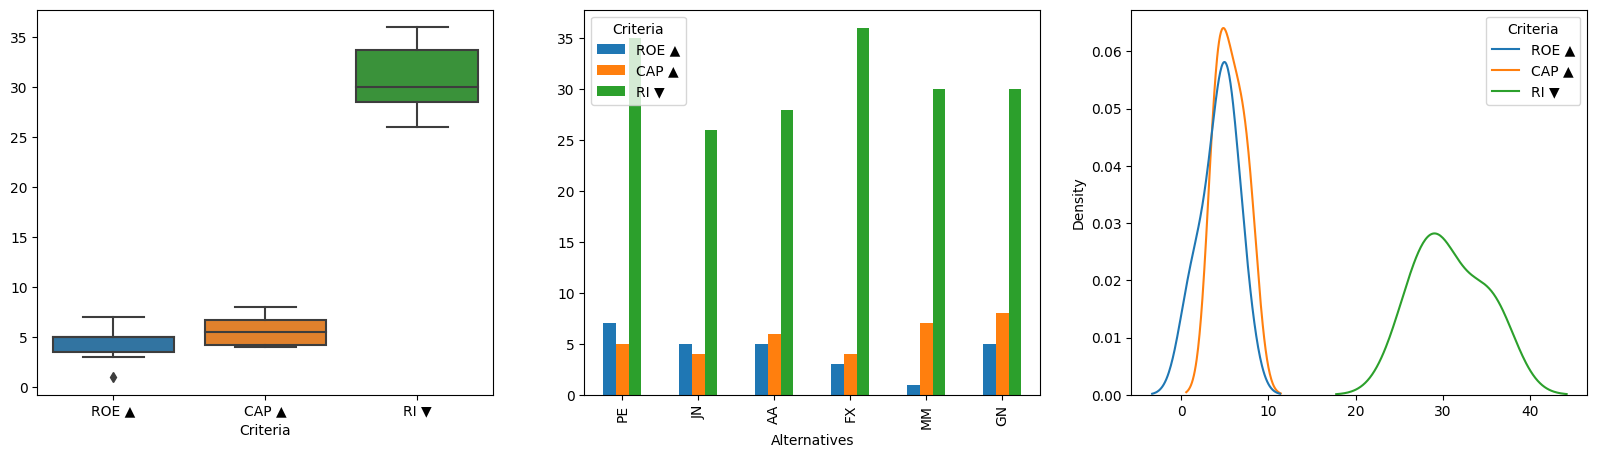

In [18]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(20, 5))
dm.plot.box(ax=axs[0])
dm.plot.bar(ax=axs[1])
dm.plot.kde(ax=axs[2]);

## Etapa 4: `skcriteria.DecisionMatrix` (cont.)

Posee una amplia variedad de plots, tanto como para pesos como para la matriz de alternativas

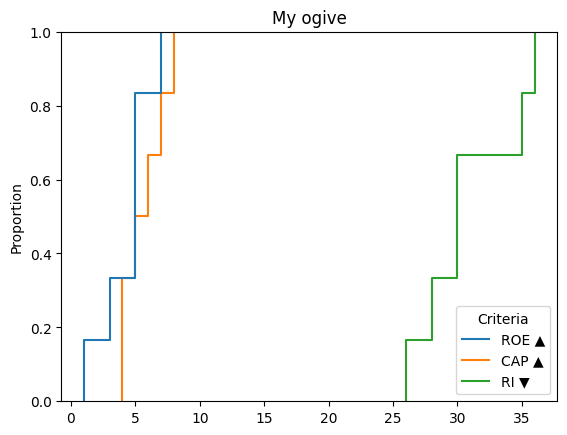

In [19]:
ax = dm.plot.ogive()
ax.set_title("My ogive");

## Etapa 4: `skcriteria.DecisionMatrix` (cont.)

L única forma de alterar una `DecisionMatrix` es con el método `copy()`

In [20]:
dm.copy(criteria="A B C".split())

,A[▲ 1.0],B[▲ 1.0],C[▼ 1.0]
PE,7,5,35
JN,5,4,26
AA,5,6,28
FX,3,4,36
MM,1,7,30
GN,5,8,30


## Etapa 4: `skcriteria.DecisionMatrix` (cont.)

Por ultimo (por ahora) se puede convertir las `DecisionMatrix` en un `DataFrame` resumen, util para compartir datos con usuarios no-Python.

In [21]:
dm.to_dataframe()

,ROE,CAP,RI
objectives,MAX,MAX,MIN
weights,1.0,1.0,1.0
PE,7,5,35
JN,5,4,26
AA,5,6,28
FX,3,4,36
MM,1,7,30
GN,5,8,30


## Erapa 5: Preánalisis de dominancia y satisfacción

- Fija “umbrales de satisfacción” para cada criterio, de manera tal que se eliminen las alternativas que en algún criterio no los superan.
- **Preánalisis de dominancia**. 
    - Si existe una alternativa dominante es sin duda la mejor elección, si no se quiere de una ordenación.
    - Una alternativa $A_i$ es dominada si existe al menos otra $A_j$, tal que $A_i$  “peor” o igual $A_j$ en 
      todos los criterios y estrictamente “peor” a $A_j$ para al  menos un criterio. 
    - En símbolos: $A_j \succeq A_i$
    
**Si aplicamos:** Solo se aceptaran alternativas que rindan al menos el $2\%$, y $FX$ es peor a todas las demás

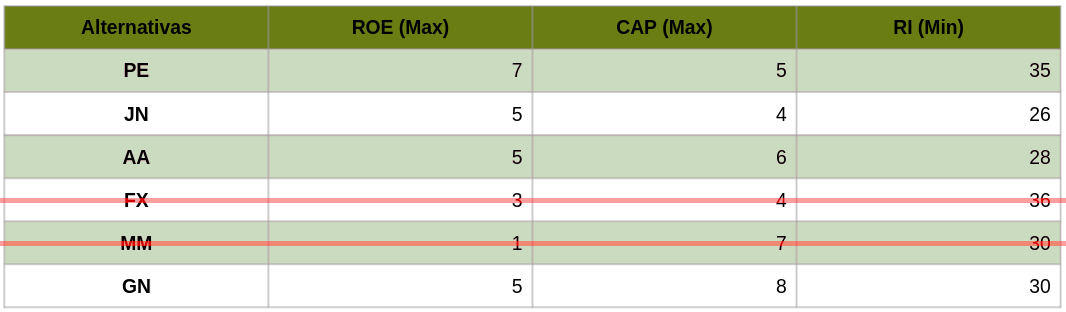
   

## Etapa 5: `DecisionMatrix.dominance`

Todas las herramientas de analisis de dominancia estan dentro del atributo `dominance` de *DecisionMatrix*

Por ejemplo podes evaluar que $A_i \succeq A_j$

In [22]:
dm.dominance()  # o dm.dominance("dominance") | dm.dominance.dominance()

Dominated,PE,JN,AA,FX,MM,GN
Dominators,,,,,,
PE,False,False,False,True,False,False
JN,False,False,False,True,False,False
AA,False,False,False,True,False,False
FX,False,False,False,False,False,False
MM,False,False,False,False,False,False
GN,False,False,False,True,True,False


o $A_i \succ A_j$

In [23]:
dm.dominance(strict=True)  # o dm.dominance("dominance", strict=True) | dm.dominance.dominance(strict=True)

Strictly dominated,PE,JN,AA,FX,MM,GN
Strict dominators,,,,,,
PE,False,False,False,True,False,False
JN,False,False,False,False,False,False
AA,False,False,False,True,False,False
FX,False,False,False,False,False,False
MM,False,False,False,False,False,False
GN,False,False,False,True,False,False


## Etapa 5: `DecisionMatrix.dominance`

Tambien podemos ver en cuantos criterios domina una alternativa a la otra con el método `bt()` (better-than) y en cuantos empatan con `eq` (equals)

In [24]:
dm.dominance.bt()  # dm.dominance("bt")

Worse than,PE,JN,AA,FX,MM,GN
Better than,,,,,,
PE,0,2,1,3,1,1
JN,1,0,1,2,2,1
AA,2,1,0,3,2,1
FX,0,0,0,0,1,0
MM,2,1,1,2,0,0
GN,2,1,1,3,2,0


In [25]:
dm.dominance.eq()  # dm.dominance("eq")

Equals to,PE,JN,AA,FX,MM,GN
Equals to,,,,,,
PE,6,0,0,0,0,0
JN,0,6,1,1,0,1
AA,0,1,6,0,0,1
FX,0,1,0,6,0,0
MM,0,0,0,0,6,1
GN,0,1,1,0,1,6


## Etapa 5: `DecisionMatrix.dominance`

Puede resumirse las tablas de dominancia en una unica `Series` que identifica si una alternativa es o no dominada

In [26]:
dm.dominance.dominated()  # dm.dominance("dominates")

Alternatives
PE    False
JN    False
AA    False
FX     True
MM     True
GN    False
Name: Dominated, dtype: bool

In [27]:
dm.dominance.dominated(strict=True)  # dm.dominance("dominates", strict=True)

Alternatives
PE    False
JN    False
AA    False
FX     True
MM    False
GN    False
Name: Strictly dominated, dtype: bool

## Etapa 5: `DecisionMatrix.dominance`

Tambien se puede estudiar la dominancia por alternativa

In [28]:
dm.dominance.dominators_of("FX")  # dm.dominance("dominators_of", a="FX")

array(['PE', 'JN', 'AA', 'GN'], dtype=object)

In [29]:
dm.dominance.dominators_of("MM")

array(['GN'], dtype=object)

In [30]:
dm.dominance("dominators_of", a="MM", strict=True)

array([], dtype='<U1')

## Etapa 5: `DecisionMatrix.dominance`

O se puede comparar de a pares

In [31]:
dm.dominance.compare("FX", "JN")

Criteria               Performance
                     ROE    CAP     RI            
Alternatives FX    False  False  False           0
             JN     True  False   True           2
Equals             False   True  False           1

In [32]:
dm.dominance.compare("MM", "JN")

Criteria               Performance
                     ROE    CAP     RI            
Alternatives MM    False   True  False           1
             JN     True  False   True           2
Equals             False  False  False           0

## Etapa 5: `DecisionMatrix.plot.dominance`

Visualmente se puede explorar la domunancia de dos formas:

1. Graficar la matriz de dominancia con sus valores de referencia

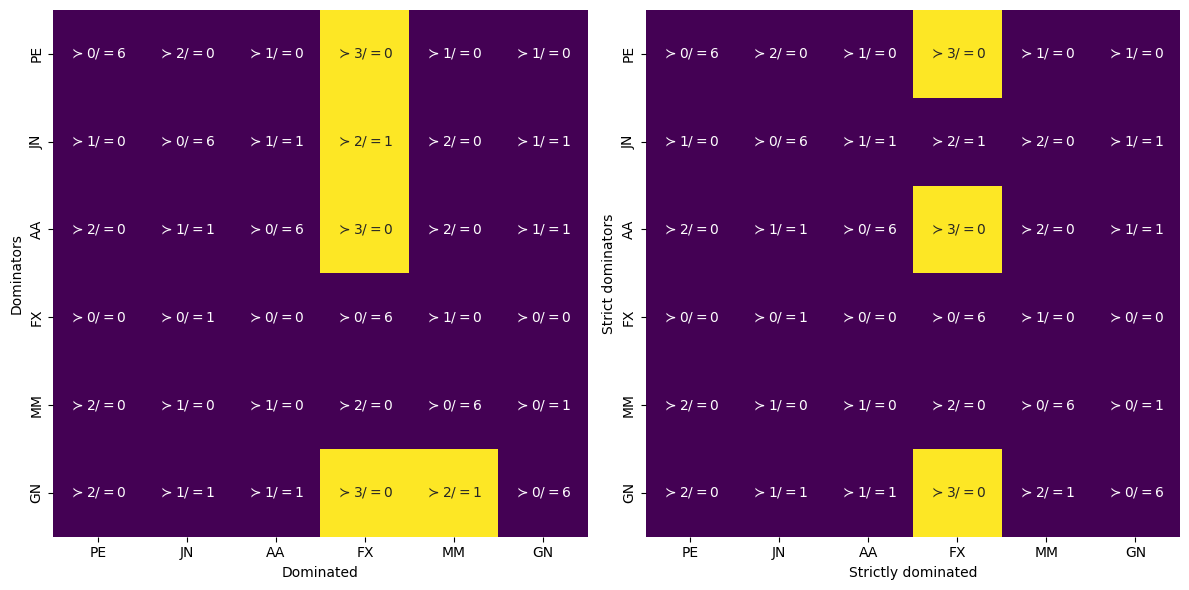

In [35]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

dm.plot.dominance(strict=False, ax=axs[0])
dm.plot.dominance(strict=True, ax=axs[1])

fig.tight_layout();

## Etapa 5: `DecisionMatrix.plot.frontier`

2. Verificar la fronteras pareto-eficientes segun diferentes pares de criterio

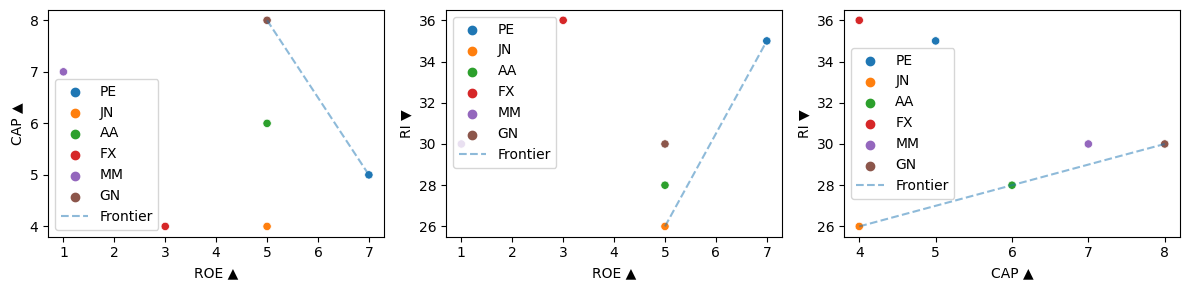

In [54]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
combs = [('ROE', 'CAP'), ('ROE', 'RI'), ('CAP', 'RI')]

for (x, y), ax in zip(combs, axs):
    dm.plot.frontier(x=x, y=y, strict=False, ax=ax, legend=False)
    
fig.tight_layout();

## Etapa 5: `skcriteria.preprocessing.filters`

Siguiendo el unciado que rezaba: "Si aplicamos: Solo se aceptaran alternativas que rindan al menos el 2%, y 𝐹𝑋 es peor a todas las demás"

Podemos utilizar el modulo `filters` para lograr ambos objetivos. 

En primer lugar podemos quedarnos con los $ROE \ge 2$.

La clase `filters.Filter` recibe como parametros un *dict* en cual cada llave es el nombre de un criterio, y cada valor es una funcion arbitraria que recibe la columna criterio como parametro y retorna un arreglo de con la misma cantidad de elementos que el array, y solo conserva las alternativas donde todos los criterios son `True`

In [69]:
from skcriteria.preprocessing import filters

flt = filters.Filter({"ROE": lambda e: e >= 2})
flt

Filter(criteria_filters={'ROE': <function <lambda> at 0x7fca8b8039a0>}, ignore_missing_criteria=False)

In [70]:
flt.transform(dm)

,ROE[▲ 1.0],CAP[▲ 1.0],RI[▼ 1.0]
PE,7,5,35
JN,5,4,26
AA,5,6,28
FX,3,4,36
GN,5,8,30


## Etapa 5: `skcriteria.preprocessing.filters`

Por simplizidad y rendimiento computacional, se ofrece una colleccion de 

- `filters.FilterEQ` `->` $=$ (igualdad)
- `filters.FilterGE` `->` $\ge$ (mayor o igual)
- `filters.FilterGT` `->` $\gt$ (mayor)
- `filters.FilterIn` `->` $\in$ (dentro)
- `filters.FilterLE` `->` $\le$ (menor o igual)
- `filters.FilterLT` `->` $\lt$ (menor)
- `filters.FilterNE` `->` $\neq$ (distinto)
- `filters.FilterNotIn` `->` $\notin$ (no dentro)

In [80]:
dm = filters.FilterGE({"ROE": 2}, ignore_missing_criteria=True).transform(dm)
dm

,ROE[▲ 1.0],CAP[▲ 1.0],RI[▼ 1.0]
PE,7,5,35
JN,5,4,26
AA,5,6,28
FX,3,4,36
GN,5,8,30


## Etapa 5: `skcriteria.preprocessing.filters`

Tambien hay filtro que elmina las alternativas dominadas o estrictiamente dominadas

In [82]:
flt = filters.FilterNonDominated(strict=True)
flt

FilterNonDominated(strict=True)

In [84]:
dm = flt.transform(dm)
dm

,ROE[▲ 1.0],CAP[▲ 1.0],RI[▼ 1.0]
PE,7,5,35
JN,5,4,26
AA,5,6,28
GN,5,8,30


## Etapas

5. Conforme a la situación, si esta lo requiere, transformar las valoraciones de las alternativas correspondientes a criterios de minimización.
    - Si los valores tienen cambio de signo: Sumamos un escalar (k) a todos los valores del criterio. 
      Donde $k \geq min$ de la serie.
    - Si los valores no tienen cambio de signo pero con sentido de optimidad minimizante (opcional según el 
      método pero recomendable): Usamos la recíproca.
6. Ponderar o asignar valoraciones a los criterios, conforme a la importancia relativa que tienen para el decisor, mediante una función de utilidad. 
Consignar en la matriz de decisión los $U(C_j)= w_jv$
**Ejemplo:** El decisor determinó que $ROE$ tiene una importancia de $2$, $CAP$ $4$ y $RI 1$
      
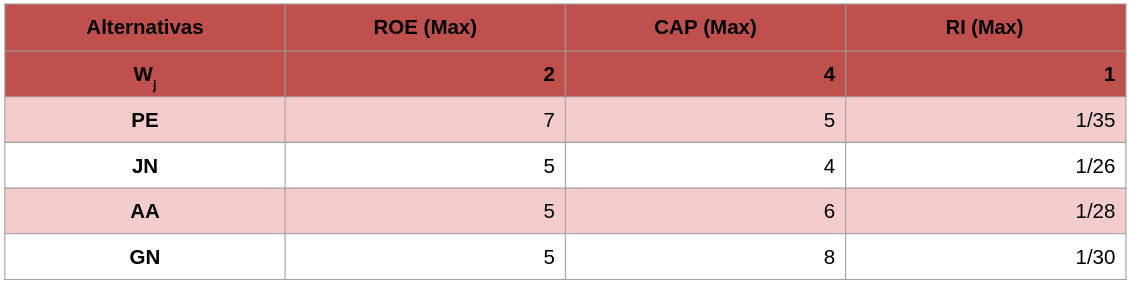

## Etapas

7. Escalar/Normalizar todas las valoraciones, consignadas en la matriz de decisión completa, para llevarlas a una escala común y hacerlas comparables. Obtener así la matriz de decisión definitiva.
    - Los pesos se normalizan por separado (Y con fracción de suma).
    
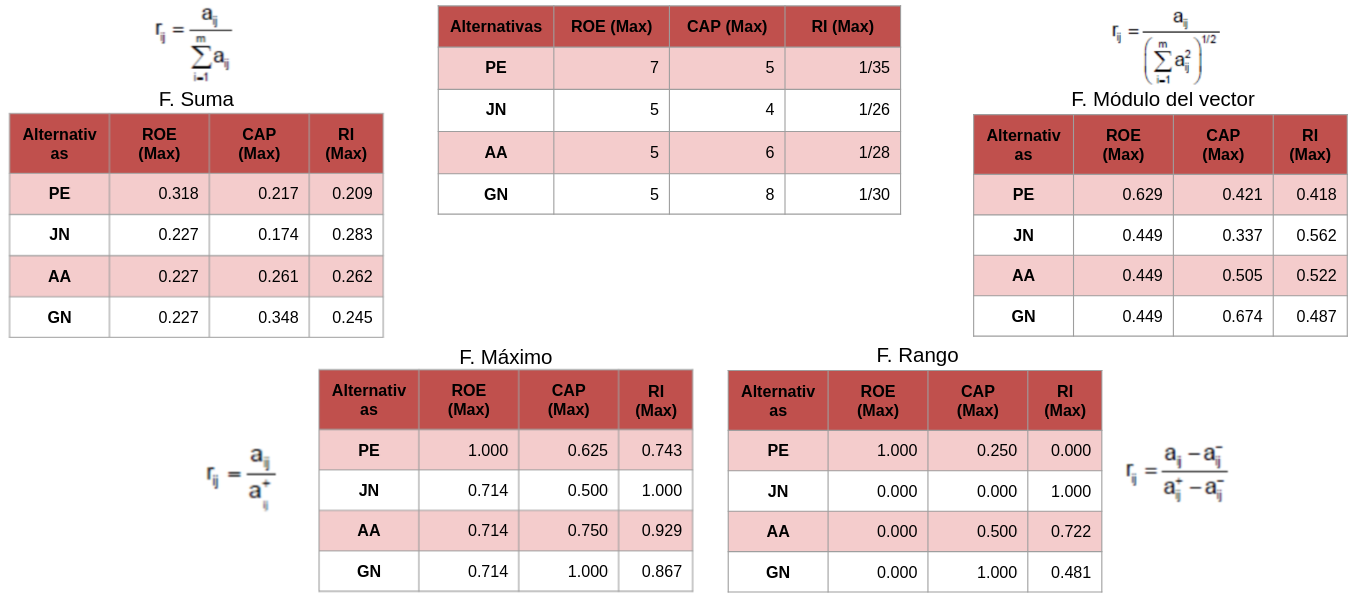
   


## Casi todas las partes del DMD

- Decisor y analista
- Conjunto de elección  - Alternativas ($A_i$)
- Atributos-Objetivos -> Criterios ($C_j$)
- Matriz de decisión ($A=[a_{ij}]$) -- se usa $r_{ij}$ cuando los valores están normalizados.
- Pesos de los criterios - Ponderación ($w_j$)
- **Agregación** (Valoración global de cada $A_i$)

<table class="clean">
    <tr>
        <td></td>
        <td>
            \begin{bmatrix}
                C_1 & C_2 & C_3 & \dots & C_n   
            \end{bmatrix}
        </td>
    </tr>
    <tr>
        <td>
            \begin{bmatrix}
                A_1 \\ A_2 \\ A_3 \\ \vdots \\ A_m
            \end{bmatrix}
        </td>
        <td>
            \begin{bmatrix}
                r_{11} & r_{12} & r_{13} & \dots & r_{1n} \\
                r_{21} & r_{22} & r_{23} & \dots & r_{2n} \\
                r_{31} & r_{32} & r_{33} & \dots & r_{3n} \\
                \vdots & \vdots & \vdots & \ddots & \vdots \\
                r_{m1} & r_{m2} & r_{m3} & \dots & r_{mn}
            \end{bmatrix}
        </td>
    </tr>
    <tr>
        <td></td>
        <td>
            \begin{bmatrix}
                w_1 & w_2 & w_3 & \dots & w_n   
            \end{bmatrix}
        </td>
    </tr>
</table>

In [ ]:
import skcriteria as skc
import matplotlib.pyplot as plt

dm = skc.mkdm(
    matrix=[[7, 5, 35], 
            [5, 4, 26], 
            [5, 6, 28], 
            [5, 8, 30]],
    objectives=[max, max, min],
    weights=[2, 4, 1],
    alternatives=["PE", "JN", "AA", "FN"],
    criteria=["ROE", "CAP", "RI"]
)
dm 

## Plots

In [ ]:
fig, axis = plt.subplots(1, 2, figsize=(12, 5))
dm.plot.heatmap(ax=axis[0])
dm.plot.kde(ax=axis[1])
fig.tight_layout();

In [ ]:
fig, axis = plt.subplots(1, 2, figsize=(10, 2))
dm.plot.wheatmap(ax=axis[0])
dm.plot.wkde(ax=axis[1])
fig.tight_layout();

## Preprocesado

In [ ]:
from skcriteria.preprocessing.invert_objectives import MinimizeToMaximize
from skcriteria.preprocessing.scalers import SumScaler

dmt = MinimizeToMaximize().transform(dm)
dmt

In [ ]:
dmt = SumScaler(target="both").transform(dmt)  # target can be "matrix", "weights" or "both"
dmt

## Plots - Preprocesados

In [ ]:
fig, axis = plt.subplots(1, 2, figsize=(12, 5))
dmt.plot.heatmap(ax=axis[0])
dmt.plot.kde(ax=axis[1])
fig.tight_layout();

In [ ]:
fig, axis = plt.subplots(1, 2, figsize=(10, 2))
dmt.plot.wheatmap(ax=axis[0])
dmt.plot.wkde(ax=axis[1])
fig.tight_layout();

## Etapas

8. Seleccionar un **MÉTODO DE AGREGACIÓN** para determinar una VALORACIÓN GLOBAL  de cada alternativa y establecer un ORDENAMIENTO FINAL.
    - **Compensatorios/MAUT:** _Ponderación lineal/Suma Ponderada/SAM_; Producto Ponderado/SPM
    - **Basados en similaridad:** _TOPSIS_, VIKOR.
    - **Escuela francesa o no compensatorios:** _ELECTRE_, PROMETHEE.

## Ahora sí todas las partes del DMD

- Decisor y analista
- Conjunto de elección  - Alternativas ($A_i$)
- Atributos-Objetivos -> Criterios ($C_j$)
- Matriz de decisión ($A=[a_{ij}]$)
- Pesos de los criterios - Ponderación ($w_j$)
- **Agregación** (Valoración global de cada $A_i$)

<table class="clean">
    <tr>
        <td></td>
        <td>
            \begin{bmatrix}
                C_1 & C_2 & C_3 & \dots & C_n   
            \end{bmatrix}
        </td>
    </tr>
    <tr>
        <td>
            \begin{bmatrix}
                A_1 \\ A_2 \\ A_3 \\ \vdots \\ A_m
            \end{bmatrix}
        </td>
        <td>
            \begin{bmatrix}
                r_{11} & r_{12} & r_{13} & \dots & r_{1n} \\
                r_{21} & r_{22} & r_{23} & \dots & r_{2n} \\
                r_{31} & r_{32} & r_{33} & \dots & r_{3n} \\
                \vdots & \vdots & \vdots & \ddots & \vdots \\
                r_{m1} & r_{m2} & r_{m3} & \dots & r_{mn}
            \end{bmatrix}
        </td>
    </tr>
    <tr>
        <td></td>
        <td>
            \begin{bmatrix}
                w_1 & w_2 & w_3 & \dots & w_n   
            \end{bmatrix}
        </td>
    </tr>
</table>    


## Método Aditivo Simple (SAM) - Ponderación Lineal - Suma Ponderada

- Es uno de los métodos más utilizados, por ser sencillo e intuitivo en su
aplicación. 
Es compensatorio.
- Requiere que las evaluaciones y los pesos sean cardinales.
- Necesita una normalización previa de las evaluaciones
- Es muy sensible al procedimiento de normalización utilizado (Suele usarse fracción de la suma). 
- El supuesto teórico más fuerte es que requiere la existencia de una función de utilidad cardinal aditiva para los criterios.
- Consiste en construir una función valor $U(A_i)$ para cada alternativa, de la forma:

$$U(A_i) = \sum_{j=1}^n w_j r_{ij}$$

- donde $w_j$ y $r_{ij}$, representan, respectivamente, a los pesos de los criterios
y las preferencias de cada alternativa con respecto a cada criterio, una
vez que han sido normalizados.


## SAM - SKCriteria

In [ ]:
from skcriteria.madm.simple import WeightedSumModel
result = WeightedSumModel().evaluate(dmt)

In [ ]:
result.e_.score

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
dmt.plot.bar(ax=ax);

## Technique for Order Preference by Similarity to Ideal Solution (TOPSIS)

- Se basa en el concepto de que es deseable que una alternativa determinada se ubique a la distancia más corta respecto de una solución ideal y a la mayor distancia respecto a una solución anti-ideal.
- El procedimiento consta de una serie de pasos que permiten calcular un proporción llamado “ratio de similaridad” que valora el desempeño de cada alternativa.
- Es compensatorio.
- Se sugiere normalizar con el módulo del vector.
- Muy intuitivo y transparente.
- Si bien acepta múltiples medidas de distancia suele utilizarse la euclídea.
- Tolera los criterios de minimización.

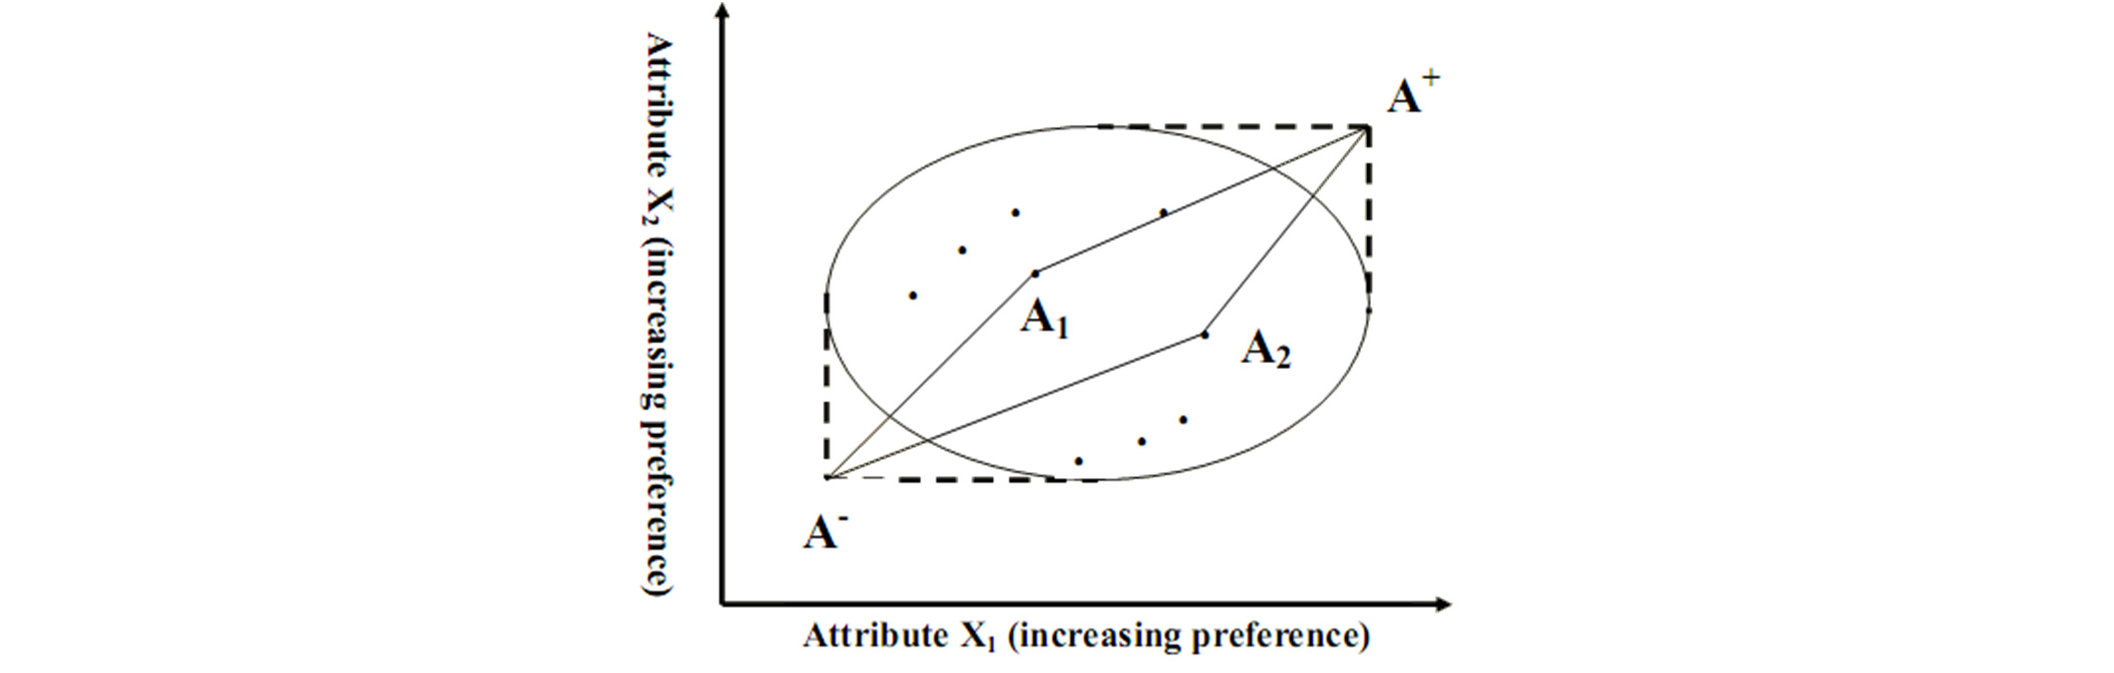

## TOPSIS - SKCriteria

Como pueden realizarse diferentes experimentos variando las funciones de agregación o normalizaciones; skcriteria proevee el concepto de *pipelines*.

In [ ]:
from skcriteria.preprocessing.scalers import VectorScaler
from skcriteria.pipeline import mkpipe
from skcriteria.madm.similarity import TOPSIS 

In [ ]:
pipe = mkpipe(
    MinimizeToMaximize(), 
    SumScaler(target="weights"), 
    VectorScaler(target="matrix"), 
    TOPSIS()
)
pipe

## TOPSIS - SKCriteria

In [ ]:
result = pipe.evaluate(dm)
result

In [ ]:
result.e_.ideal, result.e_.anti_ideal

In [ ]:
pipe.transform(dm)

## ÉLimination et Choix Traduisant la REalité (ELECTRE) - SKCriteria

- Es una familia de métodos de la "escuela francesa".
- Son métodos no compensarios.
- Diseñan internamente indices de superación entre las alternativas.
- En particular ELECTRE1, no resuelve un ranking sino un kernel.


In [ ]:
from skcriteria.madm.electre import ELECTRE1

pipe = mkpipe(
    MinimizeToMaximize(), 
    SumScaler(target="weights"), 
    VectorScaler(target="matrix"), 
    ELECTRE1()
)

In [ ]:
result = pipe.evaluate(dm)
result

In [ ]:
result.e_.matrix_discordance

## Que quedo fuera de MCDA.

- Calculo automático de pesos (esto tiene skcriteria).
- Análisis de sensibilidad y robustez.
- Ranking reversals.
- Métodos Fuzzy.

## Algunos trabajos

- Somma, D., Volante, J., Lizárraga, L., Boasso, M., Mosciaro, M. J., Poclava, M. M., ... & Ramos, J. (2011). **Aplicación de análisis multicriterio-multiobjetivo como base de un sistema espacial de soporte de decisiones para la planificación del uso sustentable del territorio en regiones forestales. caso de estudio: los bosques nativos de la provincia de salta.** Valoración de servicios ecosistémicos. Conceptos, herramientas y aplicaciones para el ordenamiento territorial. INTA, Buenos Aires, Argentina, 409-440.
- Van Heerden, N. A., Cabral, J. B., & Luczywo, N. (2021). **Evaluation of the importance of criteria for the selection of cryptocurrencies.** arXiv preprint arXiv:2109.00130.


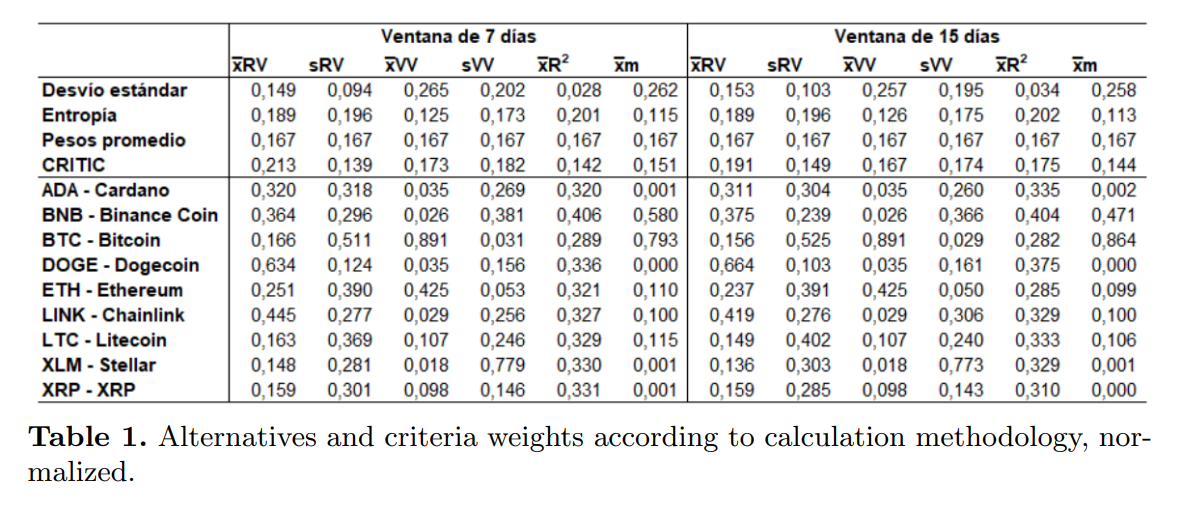

## Cerrando

- Los metodos MCDA son muy transparentes.
- Sistematizan una serie de problemas de manera muy sencilla (vimos casi toda la generalidad y algo de una libreria en 35 minutos)
- Pueden llegar a convertir un problema tonto en un producto/paper.
- El area puede interactuar muy bien con toda la bateria de "cosas" de ciencias de datos.
- Esto esta a un paso del *análisis envolvente de datos* (DEA).

## GRACIAS.

Juan - jbcabral@unc.edu.ar

In [ ]:
dmt.plot.box();